We start this notebook by typing a "magic" command that allows iPython notebooks to display plots directly in the browser.

In [1]:
# Render our plots inline
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [3]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20,20)})
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks'])

### Using plotting for data analysis

We finished our earlier notebook by analyzing the [NYPD Vehicle Collissions](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95/data) data set. We continue our analysis now, focusing on plotting.


Just in case you do not have the dataset, you can run the command below, to download the latest version:

In [4]:
# !curl 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD' -o accidents.csv

Now let's load the dataset.

In [52]:
import pandas as pd
df = pd.read_csv("accidents.csv", parse_dates = True, infer_datetime_format = True, low_memory=False)

And check the datatypes to see if there is something that needs to be coverted.

In [53]:
df.dtypes

DATE                              object
TIME                              object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED          int64
NUMBER OF PERSONS KILLED           int64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
UNIQUE KEY                         int64
VEHICLE TYPE COD

In [54]:
df['DATETIME'] = df.DATE + ' ' + df.TIME

In [55]:
df.DATETIME = pd.to_datetime(df.DATETIME, format="%m/%d/%Y %H:%M")

In [62]:
df.TIME = pd.to_datetime(df.TIME, format="%H:%M")

In [57]:
df.DATE = pd.to_datetime(df.DATE, format="%m/%d/%Y")

### Dealing with overplotting

In our last exercise, we finished by creating a scatterplot of the accidents.

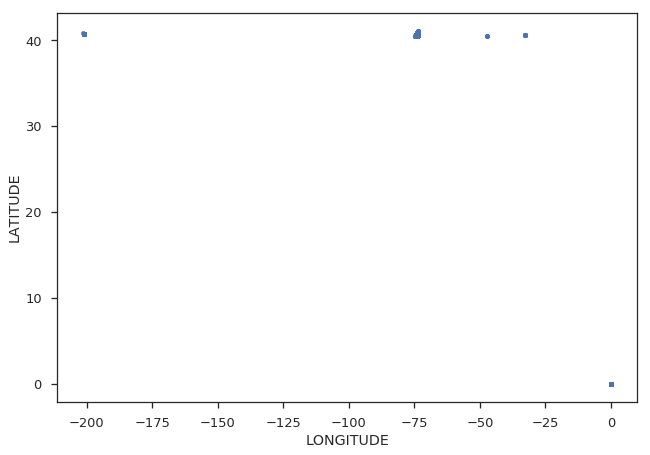

In [23]:
df.plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE'
)

Unfortunately, there were cases in the dataset where longitude and latitude were incorrect. Therefore, we create a selection condition to keep only the entries that are valid. We often call such conditions as **masks**.

In [48]:
clean_mask = (df.LATITUDE > 40) & (df.LATITUDE < 41) & (df.LONGITUDE < -72) & (df.LONGITUDE > -74.5)
cleandf = df[ clean_mask ]

Now we created the new dataframe `cleandf` and we plot again:

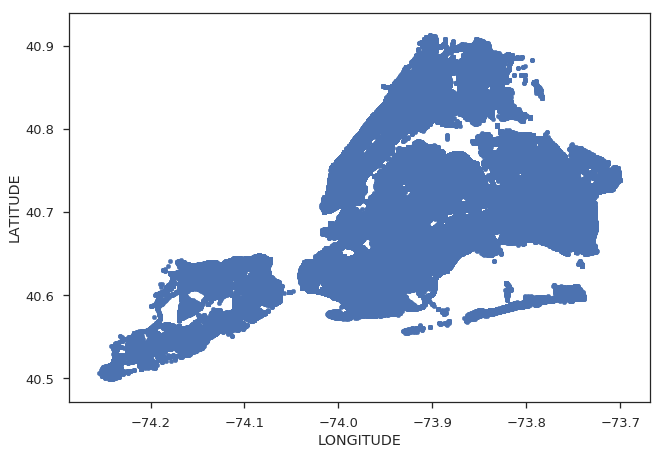

In [25]:
cleandf.plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE'
)

We start seeing the shape of NYC now. Let's make the plot a bit bigger, using the `figsize = (20,15)` option, asking the size of the figure to have length 20 on the x axis and 15 on the y axis.

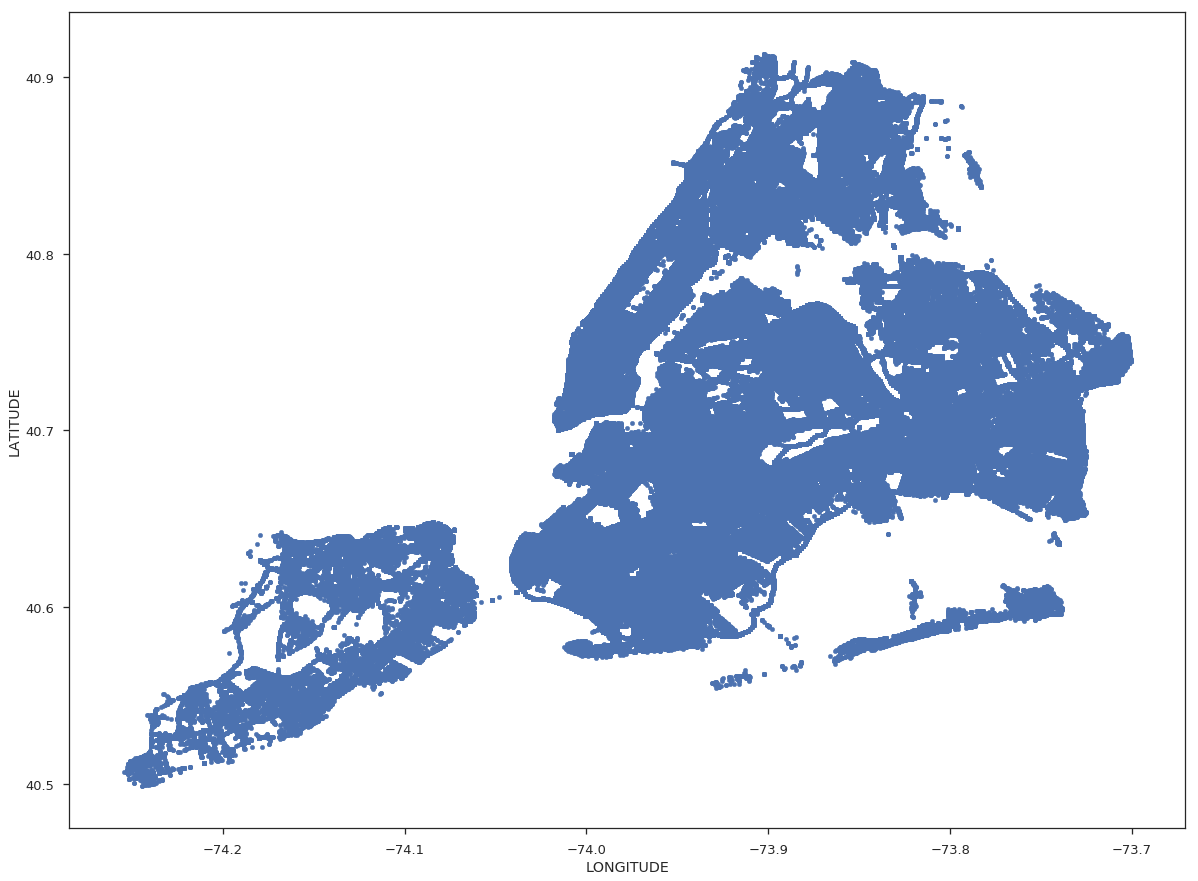

In [26]:
cleandf.plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20,15)
)

### Addressing Overplotting

The picture above is showing us that accidents happen in all places in NYC, except maybe some areas of Staten Island. But we have so many data points (~1 million), that we cannot tell anything more beyond that. This is called **overplotting**. The issue becomes increasingly common with the emergence of even medium-sized datasets, such as this one.

Below, we are doing to examine a set of techniques for addressing the issue.

##### Sampling

One solution, that is commonly used when we have too many data points, is to simply take a subset of the data. Below, by keeping just 1% of the dataset, we can get a feeling of the density if the accidents in Manhattan, especially around midtown.

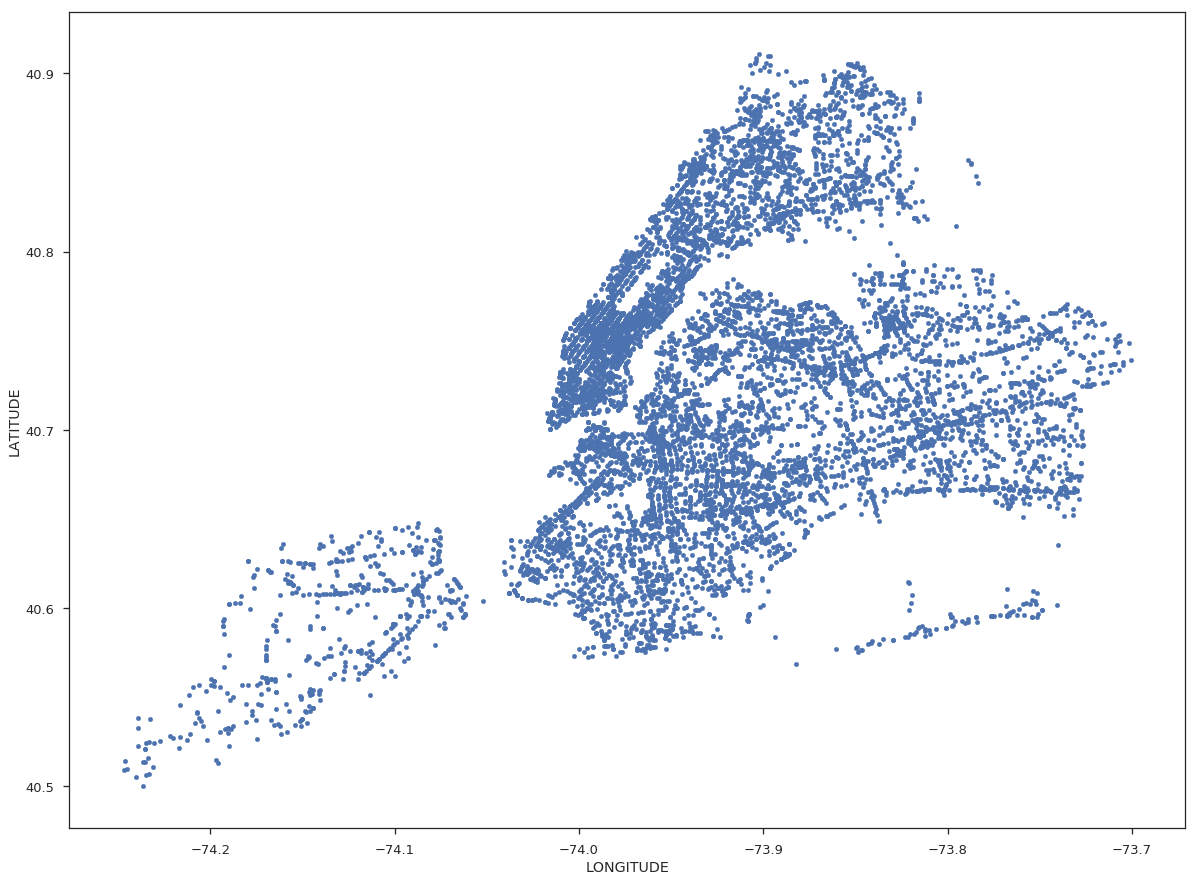

In [27]:
# We can either specify the number of data points, 
# or the percentage of the dataset that we want to keep.

# Keep 10,000 data points
# sample = cleandf.sample(n=10000)

# Keep 1% of the dataset
sample = cleandf.sample(frac=0.01)

sample.plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20,15)
)

#### Changing marker size

Another technique that we can use is to reduce the market size. By default, in Pandas, the marker size for scatterplots is 5 pixels. We can reduce it to 1 pixel by setting `s=1`, or even smaller, eg., `s=0.5`. With this setting, we start seeting that there is a higher density of accidents among major highways. 

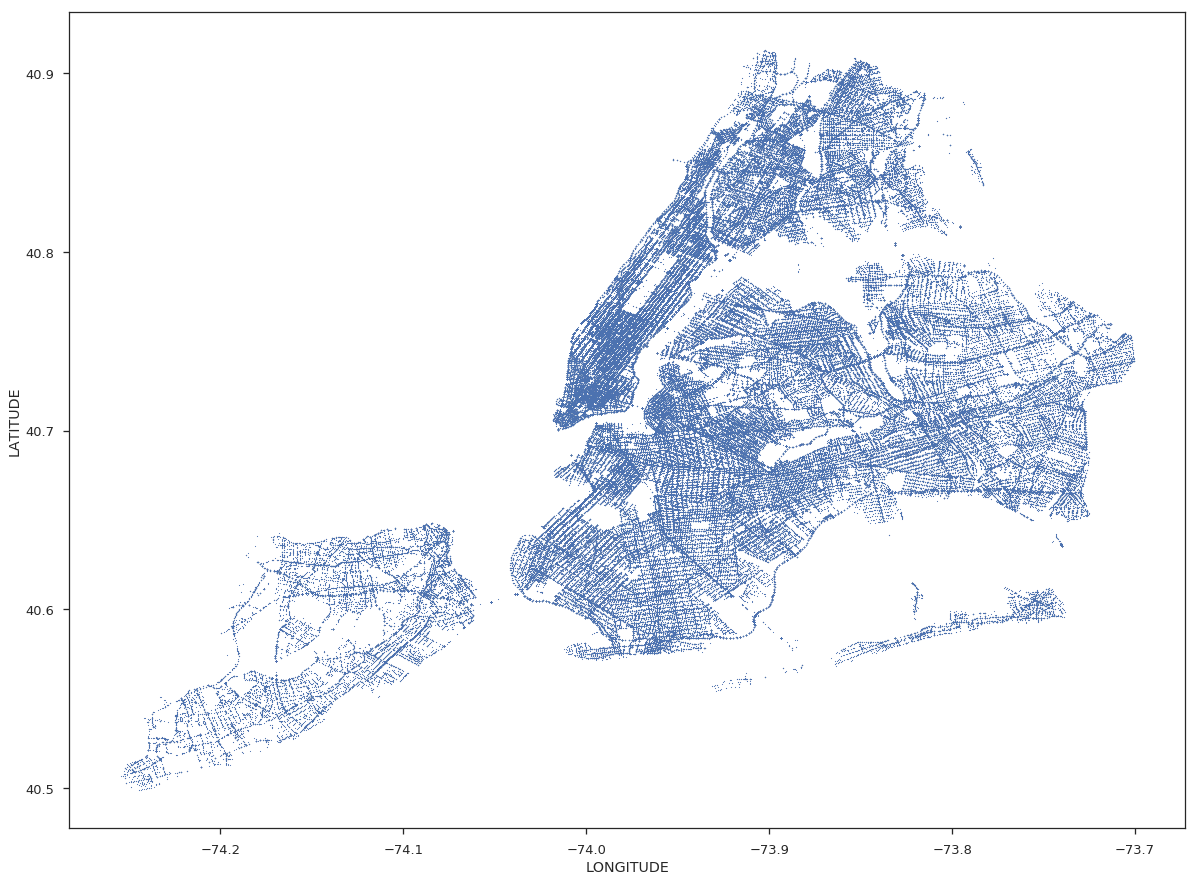

In [28]:
cleandf.plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 15),
    s = 0.5
)

#### Changing Marker Transparency

Another common technique is to change the  transparency of the  markers. Using semi-transparent markers we can then optically separate areas where there are many points (the area will still look densely plotted), from areas where there are only a few markers. We can set the transparency using the `alpha` parameter. Setting `alpha=1` means no transparency, while `alpha=0` is full transparency.

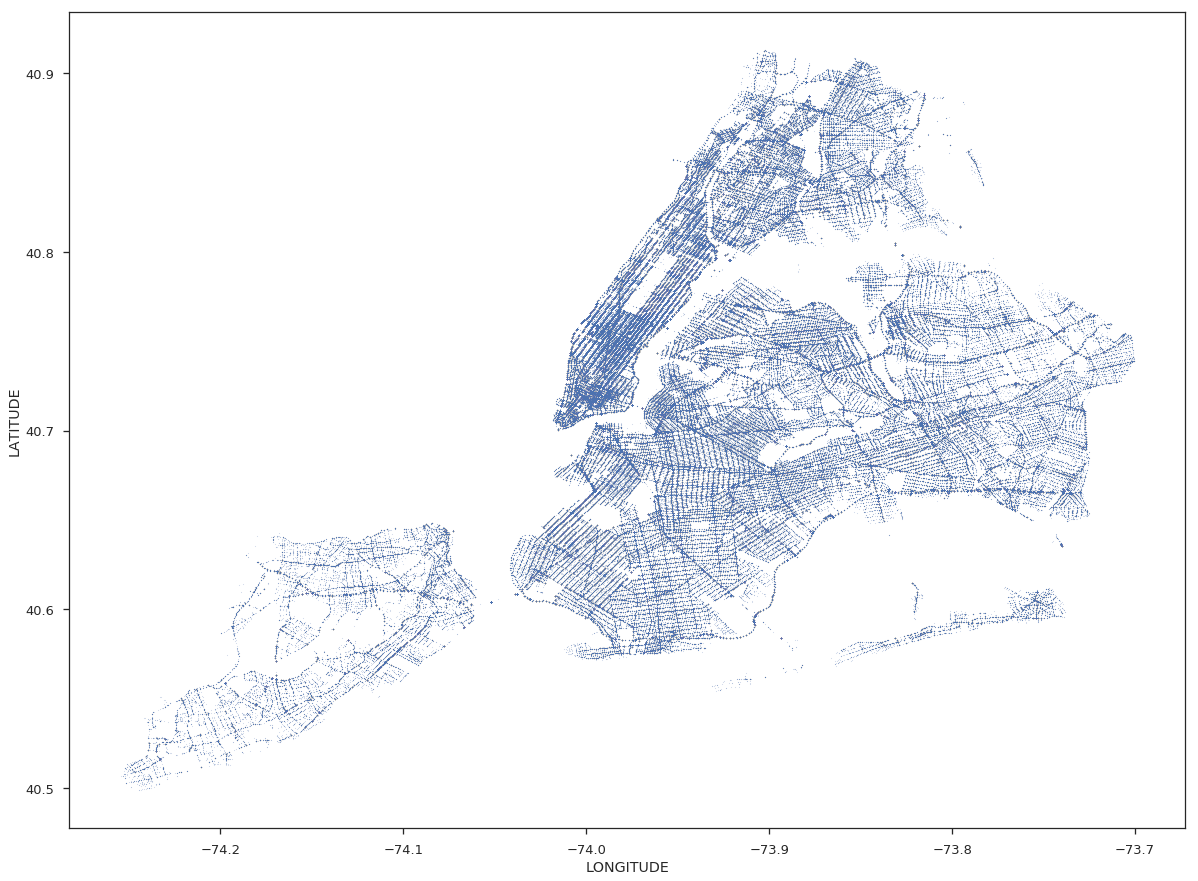

In [29]:
cleandf.plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 15),
    s = 0.5,
    alpha = 0.2
)

#### Creating 2d histograms, density plots, and contour plots

In the picture above, we can visually see that Manhattan, especially eastern midtown, and the area downtown near the entrance to the bridges, has a higher density. We can actually directly histograms and density plots on 2-dimensions.

##### Hexagonal bin plot

The hexbin plot created a 2-d histogram, where the color signals the number of points within a particular area. The `gridsize` parameter chooses the size of each bin. Higher values offer higher granularity, but very high values tend to create sparsity, when we do not have enough data points.

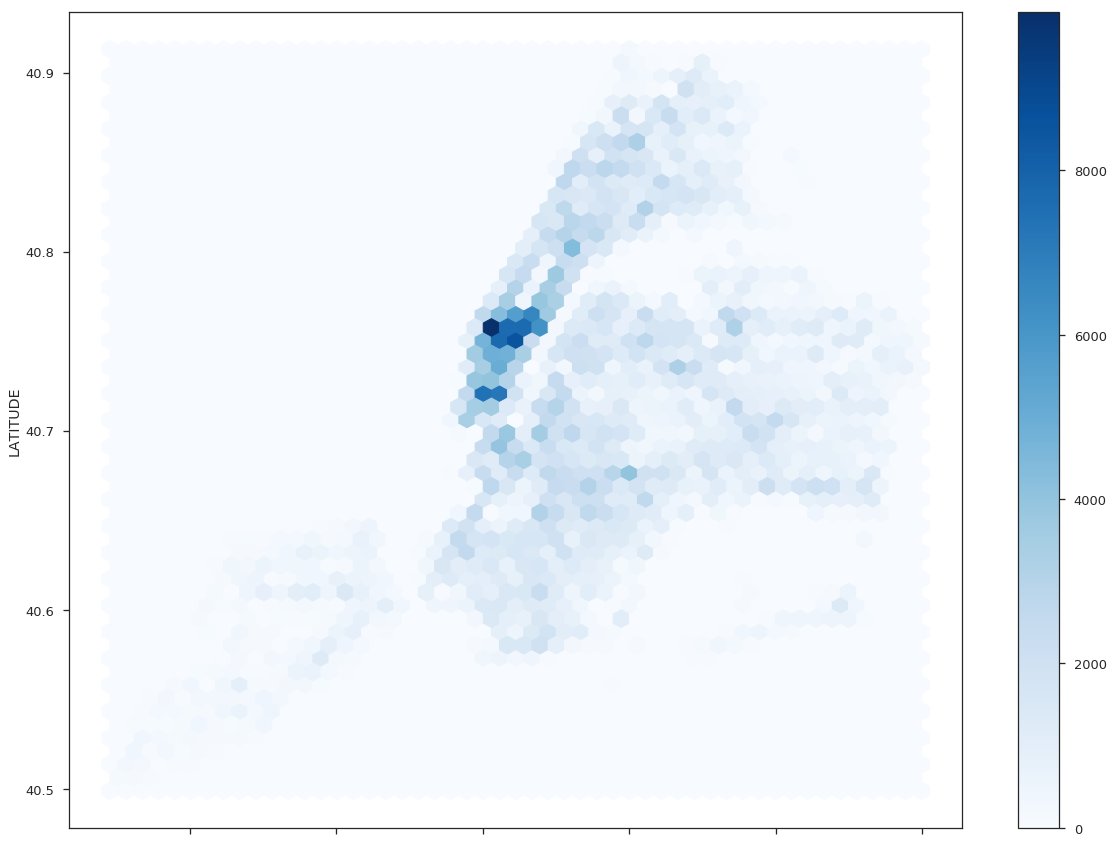

In [88]:
# Hexbin plot
cleandf.plot(
    kind='hexbin',
    x='LONGITUDE', 
    y='LATITUDE', 
    gridsize=50, 
    cmap=plt.cm.Blues,
    figsize = (20, 15)
)

##### 2d density  and contour plots

An alternative to the hexbin plots is to use density plots in two dimensions.

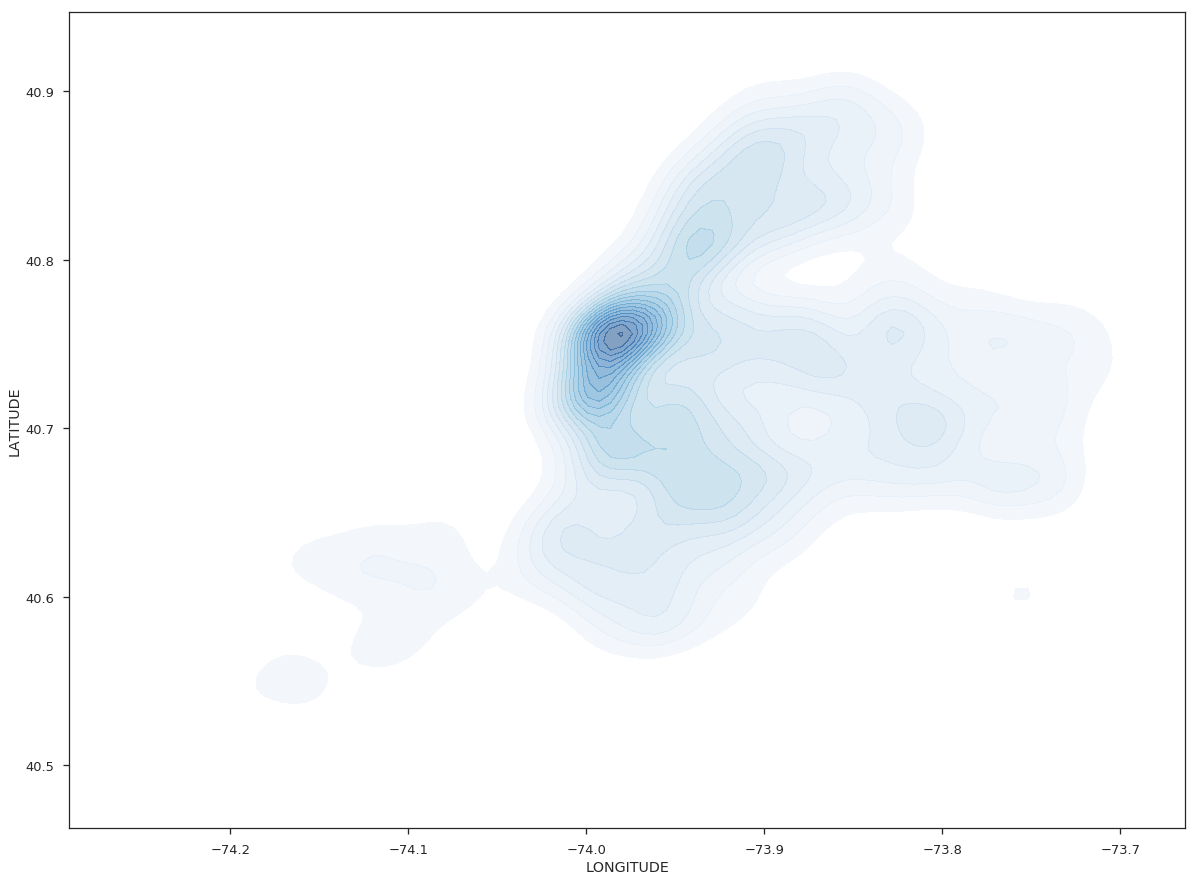

In [90]:
# Basic 2D density plot
plt.subplots(figsize=(20,15))

# We take a sample, because density plots take a long time to compute
# and a sample is typically as good as the full dataset
sample = cleandf.sample(10000)

sns.kdeplot(sample.LONGITUDE, sample.LATITUDE, 
            gridsize=100, # controls the resolution
            cmap=plt.cm.Blues,  # color scheme
            shade=True, # whether to have a density plot (True), or just the contours (False)
            alpha = 0.5,
            shade_lowest=False, 
            n_levels=20 # How many contours/levels to have
)

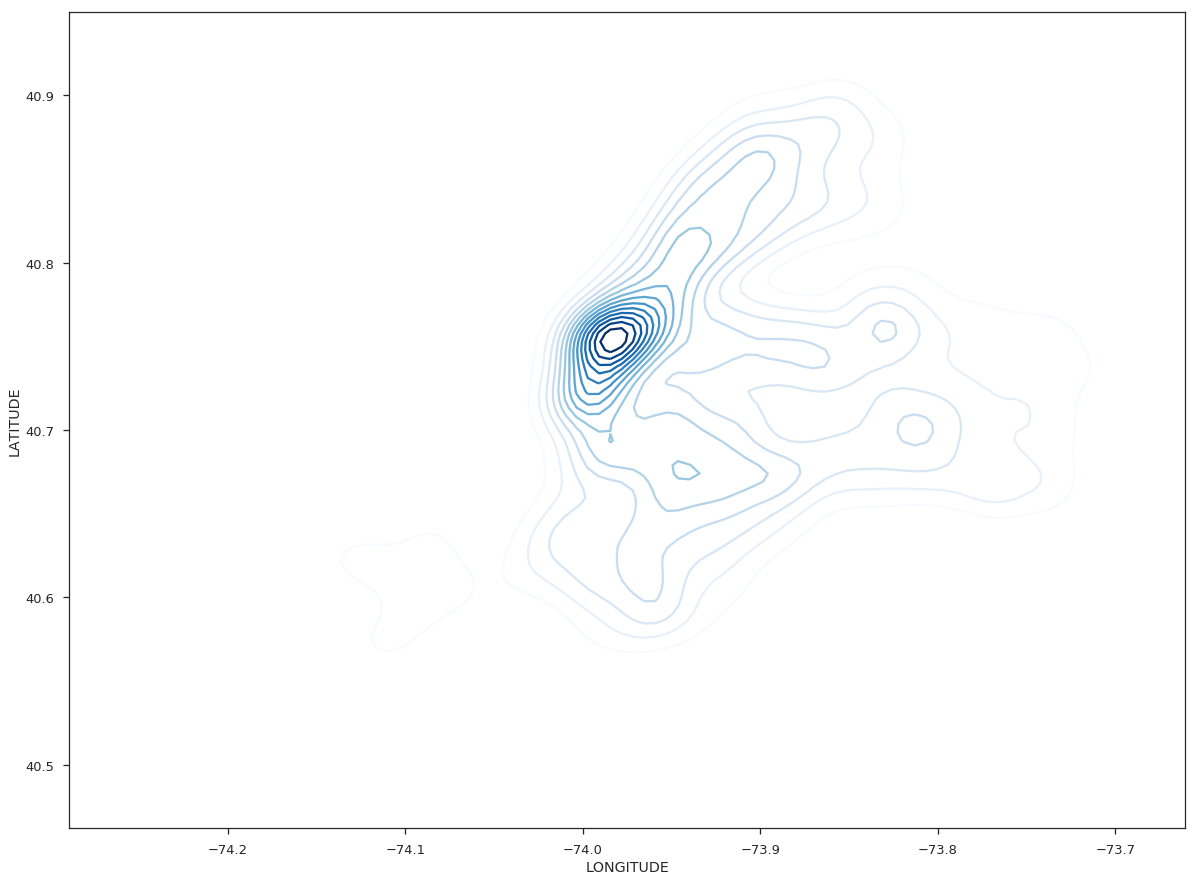

In [92]:
# Basic 2D contour plot
plt.subplots(figsize=(20,15))

# We take a sample, because density plots take a long time to compute
# and a sample is typically as good as the full dataset
sample = cleandf.sample(10000)

sns.kdeplot(sample.LONGITUDE, sample.LATITUDE, 
            gridsize=100,
            cmap=plt.cm.Blues, 
            shade=False, 
            shade_lowest=False, 
            n_levels=15
)

#### Combining plots

So far, we examined how to create individual plots. We can even combine multiple plots together, using the `ax` parameter. (Historically, `ax` is the term used in MATLAB to refer to an individual plot.) So, let's say that we want to combine the scatter plots with the contour plot above:

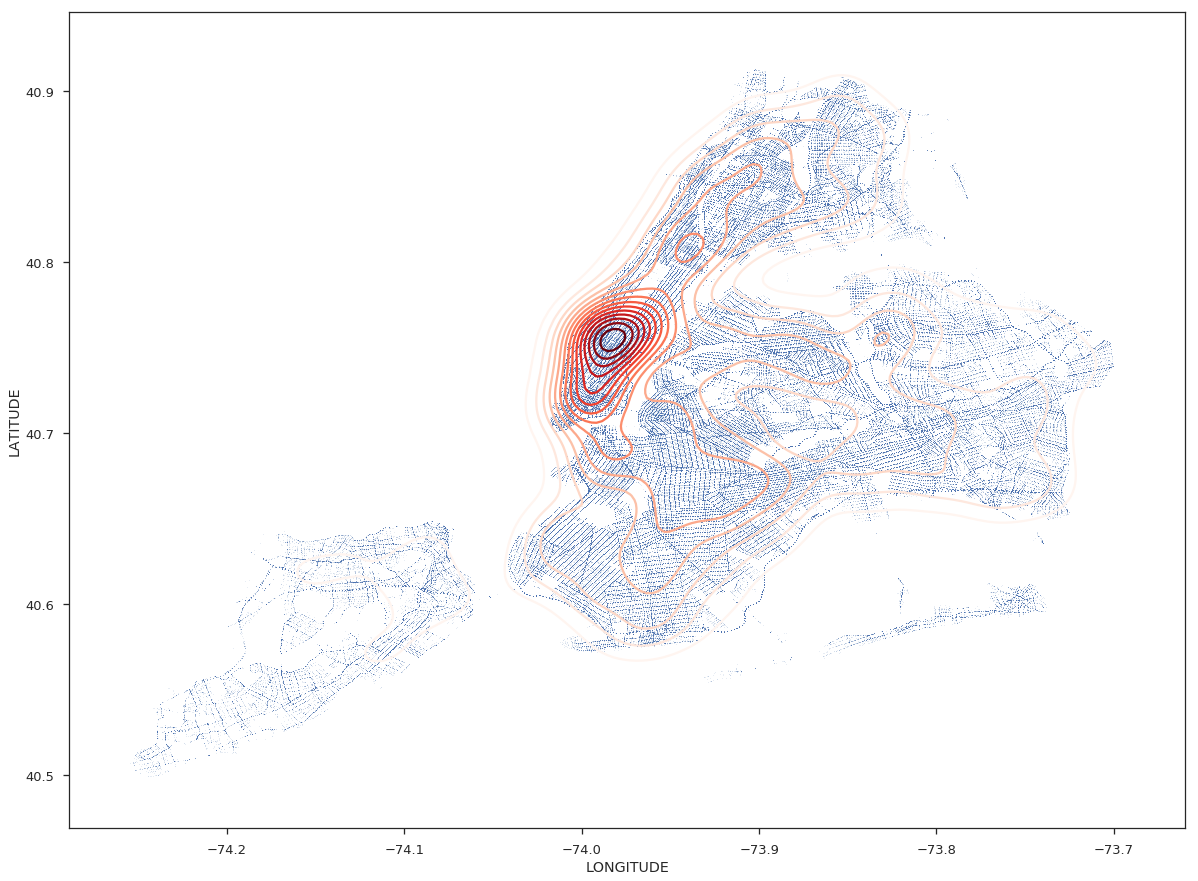

In [117]:
scatterplot = cleandf.plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 15),
    s = 0.5,
    alpha = 0.1
)

sample = cleandf.sample(10000)

sns.kdeplot(sample.LONGITUDE, sample.LATITUDE, 
            gridsize=200,
            cmap=plt.cm.Reds, 
            shade=False, 
            shade_lowest=False, 
            n_levels=15,
            ax = scatterplot
)

#### Adding Geographic Boundaries

When dealing with spatial data, it is often useful to be able to add geographical details in our analysis. While we will not go in details here about the analysis of spatial data, let me mention the concept of **shapefiles**. Shapefiles are files that describe boundaries of geographical areas. Once we have a shapefile, we can then generate various spatial analyses but we will leave that discussion for another session. For now we will simply examine how to add some geographical detail in our plot.

The first step is to identify a shapefile for NYC. From the NYC Open data, we can get a shapefile of the NYC neighborhoods:

In [ ]:
# Dataset from NYC Open Data: https://data.cityofnewyork.us/City-Government/Neighborhood-Tabulation-Areas/cpf4-rkhq
!curl 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON' -o nyc-neighborhoods.geojson

We can then use _GeoPandas_ to load the *geojson* file into Python:

In [121]:
df_nyc = gpd.GeoDataFrame.from_file('data/nyc-neighborhoods.geojson')

The file contains the name of each neighborhood, some other details, and a (set of) polygons that describe the shape of each neighborhood.

In [122]:
df_nyc.head()

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
0,BK88,54005019.0709,047,Borough Park,39247.2280277,Brooklyn,3,(POLYGON ((-73.97604935657381 40.6312759056467...
1,QN52,29454379.9879,081,East Flushing,25843.3649355,Queens,4,(POLYGON ((-73.79493246233996 40.7577980300745...
2,QN48,34164217.5747,081,Auburndale,32446.878673,Queens,4,"(POLYGON ((-73.77573836927098 40.743325647164,..."
3,QN51,52488277.0737,081,Murray Hill,33266.9048112,Queens,4,(POLYGON ((-73.80379022888246 40.7756101117924...
4,QN27,19726845.7031,081,East Elmhurst,19816.712323,Queens,4,(POLYGON ((-73.86109724335759 40.7636644770869...


In [ ]:
We can plot the polugons, using a standard plot command:

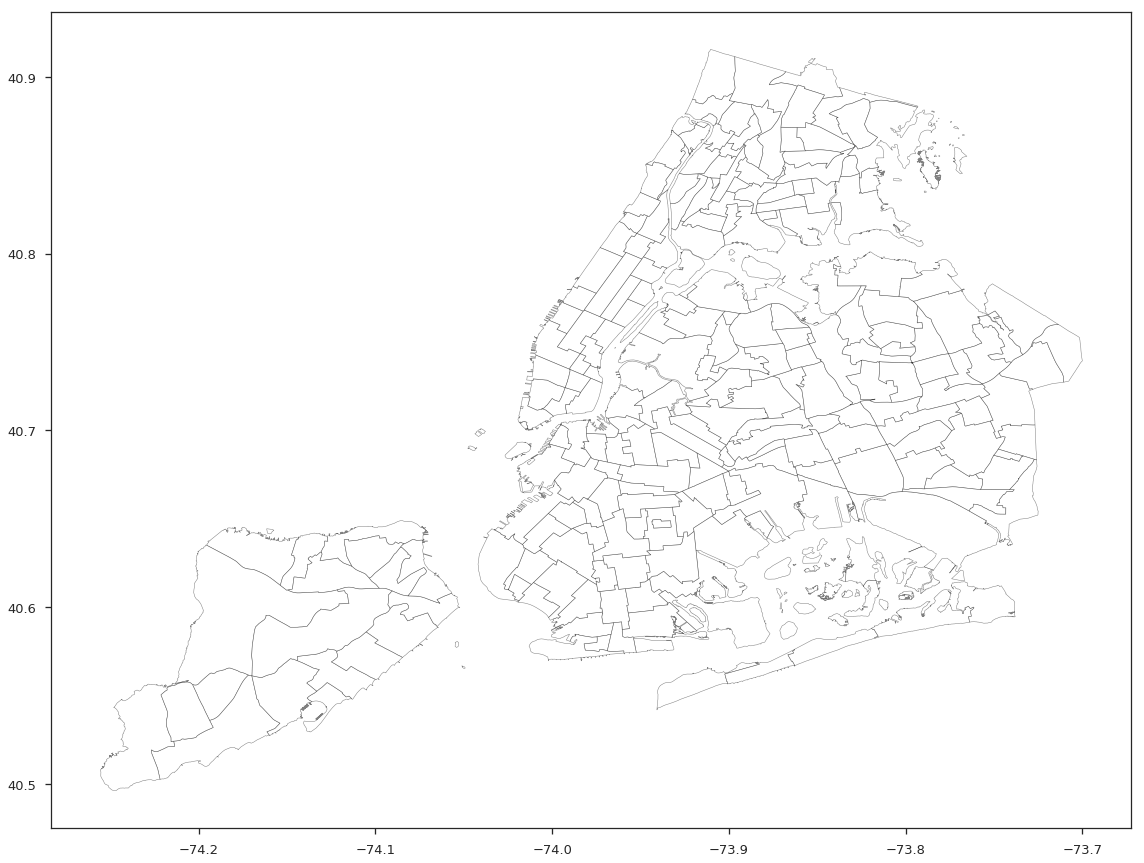

In [124]:
df_nyc.plot(linewidth=0.5, color='White',edgecolor = 'Black', figsize = (20,15), alpha=0.5)

Now let's combine the geo-plot with our earlier plots:

In [ ]:
base = df_nyc.plot(linewidth=0.5, color='White',edgecolor = 'Black', figsize = (20,15), alpha=0.5)

scatterplot = cleandf.plot(kind='scatter', 
    x = 'LONGITUDE', y = 'LATITUDE',
    figsize = (20, 15),
    s = 0.5, alpha = 0.1,
    ax = base
)

sample = cleandf.sample(10000)
sns.kdeplot(sample.LONGITUDE, sample.LATITUDE, 
            gridsize=200, n_levels=15, 
            shade=False, alpha = 0.8,
            cmap=plt.cm.Reds,  shade_lowest=False, 
            ax = scatterplot
)

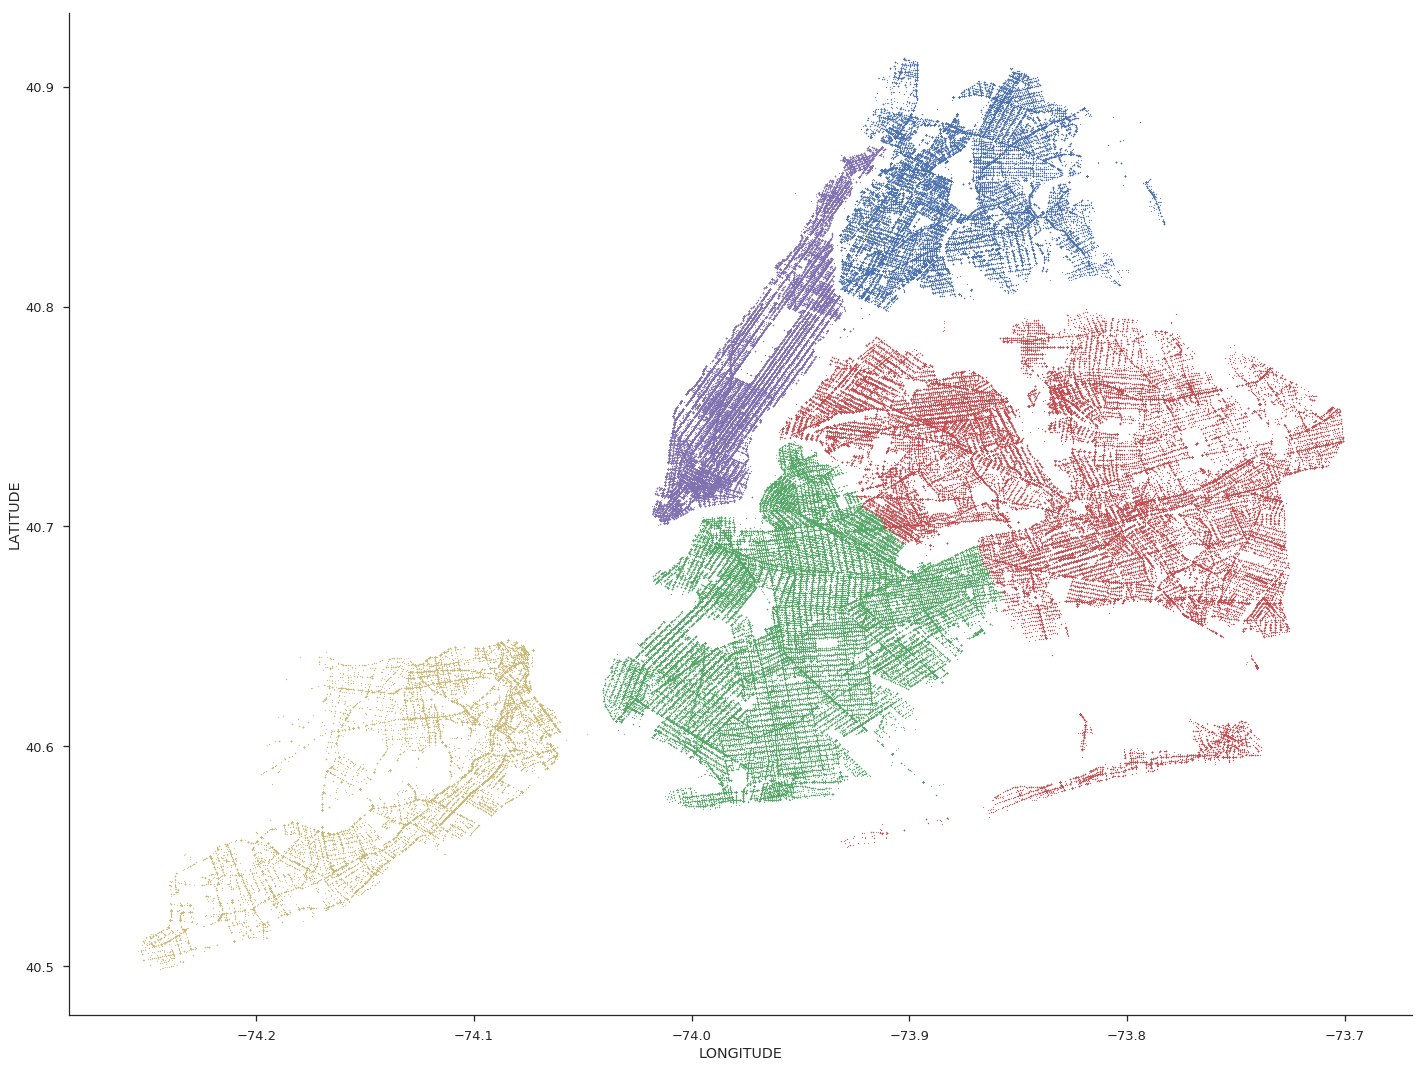

In [107]:
# plt.subplots(figsize=(20,20))

sns.lmplot( data=cleandf, 
           x="LONGITUDE", y="LATITUDE", 
           fit_reg=False, hue='BOROUGH', legend=False, 
           size=15, aspect=1.33, # controls the size of the figure
           scatter_kws={"alpha":0.8,"s":1.5} )


In [ ]:
df_bronx     = cleandf[cleandf.BOROUGH == 'BRONX']
df_brooklyn  = cleandf[cleandf.BOROUGH == 'BROOKLYN']
df_queens    = cleandf[cleandf.BOROUGH == 'QUEENS']
df_manhattan = cleandf[cleandf.BOROUGH == 'MANHATTAN']
df_staten    = cleandf[cleandf.BOROUGH == 'STATEN ISLAND']

args = dict(kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 20),
    s = 1,
    alpha = 0.2 )

plot1 = df_manhattan.plot(color='blue', **args)
plot2 = df_bronx.plot(ax = plot1, color='red', **args)
plot3 = df_brooklyn.plot(ax = plot2, color='green', **args)
plot4 = df_queens.plot(ax = plot3, color='orange', **args)
plot5 = df_staten.plot(ax = plot4, color='purple', **args)

In [ ]:
# Keep the top-3 most common contributing factors for accidents
# We skip the element at position 0, because it is "undefined"
top_vehicles = cleandf['VEHICLE TYPE CODE 1'].value_counts()[:4].index.tolist()
top_vehicles

In [ ]:
mask = cleandf['VEHICLE TYPE CODE 1'].isin(top_vehicles)

In [ ]:
sns.lmplot(x="LONGITUDE", y="LATITUDE", data=cleandf[mask],
    col='VEHICLE TYPE CODE 1', hue="BOROUGH",  fit_reg=False,
           col_wrap=2, ci=None, palette="muted", size=10, aspect = 1,
           scatter_kws={"s": 1, "alpha": 1})

In [ ]:
mask = cleandf['VEHICLE TYPE CODE 1'].isin(top_vehicles)
sns.lmplot( x="LONGITUDE", y="LATITUDE", data=cleandf[mask], 
           fit_reg=False, hue='VEHICLE TYPE CODE 1', legend=False, 
           palette = "hls",
           size=15, aspect=1, # control the size of the figure
           scatter_kws={"alpha":0.75,"s":1} ) 

In [ ]:

plt.axis('equal')
sns.kdeplot(sample.LONGITUDE, sample.LATITUDE, 
            gridsize=100,
            cmap=plt.cm.Blues, 
            shade=True, 
            shade_lowest=False, 
            n_levels=20,
            alpha=0.5,
            ax = base
)

In [ ]:
# Basic 2D density plot
plt.subplots(figsize=(20,20))
# plt.axis('equal')

cars =  cleandf[ cleandf['VEHICLE TYPE CODE 1'] == 'PASSENGER VEHICLE' ].sample(10000)
taxis = cleandf[ cleandf['VEHICLE TYPE CODE 1'] == 'TAXI' ].sample(10000)

base = df_nyc.plot(linewidth=0.5, color='White',edgecolor = 'Black', figsize = (20,20), alpha=0.5)
carplot = sns.kdeplot(cars.LONGITUDE, cars.LATITUDE, 
            gridsize=100,
            cmap=plt.cm.Blues, 
            shade=True, 
            alpha = 0.5,
            shade_lowest=False, 
            n_levels=20,
            ax = base
)
taxiplot = sns.kdeplot(taxis.LONGITUDE, taxis.LATITUDE, 
            gridsize=100,
            cmap=plt.cm.Reds, 
            shade=True, 
            alpha = 0.5,
            shade_lowest=False, 
            n_levels=20,
            ax = base
)

taxiplot

### Bonus plot

In [ ]:
# In the code below, we create three plots
# One with  all the accidents (in black)
# One with all accidents that resulted in an injury (with orange)
# One with all the accidents with deaths (with red dots) 
# Then wen combine the  plots using the "ax" parameter

# df = pd.read_csv("accidents.csv", low_memory=False)

# We put conditions to keep only rows that 
# have reasonable values for LONGITUDE and LATITUDE
# The & character is the "AND" in Pandas
# the df.LATITUDE is equivalent to df['LATITUDE']
cleandf = df[ (df.LATITUDE > 40) & (df.LATITUDE < 41) & (df.LONGITUDE < -72) & (df.LONGITUDE > -74.5) ]


all_accidents_plot = cleandf.plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 20), # changes the size of the plot to be bigger and square
    color = 'black',
    alpha = 0.05, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 0.5 # make the size of the market just 0.5 pixel
)


injured_plot = cleandf[
    cleandf['NUMBER OF PERSONS INJURED']>=1
    # note that we cannot use the df.NUMBER OF PERSON INJURED notation
    # because the attribute contains spaces.
].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 20), # changes the size of the plot to be bigger and square
    alpha = 0.1, # makes the data points transparent (1 = opaque, 0 fully transparent)
    color = 'orange',
    ax = all_accidents_plot, # the ax parameter allows us to combine plots
    s = 1 # make the size of the market just 1 pixel
)

cleandf[
    cleandf['NUMBER OF PERSONS KILLED']>=1 # we want only accidents with at least one death
    # note that we cannot use the df.NUMBER OF PERSON KILLED notation
    # because the attribute contains spaces.
].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 20), # changes the size of the plot to be bigger and square
    alpha = 0.85, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 5, # make the size of the market just 1 pixel
    color = 'red',
    ax = injured_plot # the ax parameter allows us to combine plots
)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde


In [ ]:
from scipy.stats import kde

cleandf = df[ (df.LATITUDE > 40) & (df.LATITUDE < 41) & (df.LONGITUDE < -72) & (df.LONGITUDE > -74.5) ]
x, y = cleandf.as_matrix(columns=['LONGITUDE', 'LATITUDE']).T

In [ ]:
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
nbins = 30

data = cleandf.as_matrix(columns=['LONGITUDE', 'LATITUDE']).T
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
axes[0].set_title('Calculate Gaussian KDE')
axes[0].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.BuGn_r)
 
# add shading
axes[1].set_title('2D Density with shading')
axes[1].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)


In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
nbins = 100

sample = cleandf.sample(10000)
data = sample.as_matrix(columns=['LONGITUDE', 'LATITUDE']).T
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# contour
ax.set_title('Contour')
ax.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
levels = 30
ax.contour(xi, yi, zi.reshape(xi.shape), levels, cmap=plt.cm.BuGn_r )


In [ ]:
# In the code below, we create three plots
# One with  all the accidents (in black)
# One with all accidents that resulted in an injury (with orange)
# One with all the accidents with deaths (with red dots) 
# Then wen combine the  plots using the "ax" parameter

# df = pd.read_csv("accidents.csv", low_memory=False)

# We put conditions to keep only rows that 
# have reasonable values for LONGITUDE and LATITUDE
# The & character is the "AND" in Pandas
# the df.LATITUDE is equivalent to df['LATITUDE']
cleandf = df[ (df.LATITUDE > 40) & (df.LATITUDE < 41) & (df.LONGITUDE < -72) & (df.LONGITUDE > -74.5) ]


all_accidents_plot = cleandf.plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 20), # changes the size of the plot to be bigger and square
    color = 'black',
    alpha = 0.05, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 0.5 # make the size of the market just 0.5 pixel
)


injured_plot = cleandf[
    cleandf['NUMBER OF PERSONS INJURED']>=1
    # note that we cannot use the df.NUMBER OF PERSON INJURED notation
    # because the attribute contains spaces.
].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 20), # changes the size of the plot to be bigger and square
    alpha = 0.1, # makes the data points transparent (1 = opaque, 0 fully transparent)
    color = 'orange',
    ax = all_accidents_plot, # the ax parameter allows us to combine plots
    s = 1 # make the size of the market just 1 pixel
)

ax = cleandf[
    cleandf['NUMBER OF PERSONS KILLED']>=1 # we want only accidents with at least one death
    # note that we cannot use the df.NUMBER OF PERSON KILLED notation
    # because the attribute contains spaces.
].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 20), # changes the size of the plot to be bigger and square
    alpha = 0.85, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 5, # make the size of the market just 1 pixel
    color = 'red',
    ax = injured_plot # the ax parameter allows us to combine plots
)

sns.set_style("white")
mask = cleandf['NUMBER OF PERSONS INJURED']>=1
sample = cleandf[mask].sample(10000)

sns.kdeplot(sample.LONGITUDE, sample.LATITUDE, gridsize=100, alpha=0.5,
            cmap=plt.cm.Reds, shade=True, shade_lowest=False, n_levels=15, ax = ax)


In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
df_nyc = gpd.GeoDataFrame.from_file('data/nyc-neighborhoods.geojson')
base = df_nyc.plot(linewidth=0.5, color='White',edgecolor = 'Black', figsize = (20,20), alpha=0.75)

cleandf = df[ (df.LATITUDE > 40) & (df.LATITUDE < 41) & (df.LONGITUDE < -72) & (df.LONGITUDE > -74.5) ]


all_accidents_plot = cleandf.plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 20), # changes the size of the plot to be bigger and square
    color = 'black',
    alpha = 0.05, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 0.5, # make the size of the market just 0.5 pixel
    ax = base
)


injured_plot = cleandf[
    cleandf['NUMBER OF PERSONS INJURED']>=1
    # note that we cannot use the df.NUMBER OF PERSON INJURED notation
    # because the attribute contains spaces.
].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 20), # changes the size of the plot to be bigger and square
    alpha = 0.05, # makes the data points transparent (1 = opaque, 0 fully transparent)
    color = 'orange',
    ax = all_accidents_plot, # the ax parameter allows us to combine plots
    s = 1 # make the size of the market just 1 pixel
)

ax = cleandf[
    cleandf['NUMBER OF PERSONS KILLED']>=1 # we want only accidents with at least one death
    # note that we cannot use the df.NUMBER OF PERSON KILLED notation
    # because the attribute contains spaces.
].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 20), # changes the size of the plot to be bigger and square
    alpha = 0.85, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 5, # make the size of the market just 1 pixel
    color = 'red',
    ax = injured_plot # the ax parameter allows us to combine plots
)

sns.set_style("white")
mask = cleandf['NUMBER OF PERSONS KILLED']>=1
sample = cleandf[mask] # .sample(10000)

sns.kdeplot(sample.LONGITUDE, sample.LATITUDE, gridsize=100, alpha=0.35,
            cmap=plt.cm.Reds, shade=True, shade_lowest=False, n_levels=15, ax = ax)

plt.axis('equal')